## CNV Profiling

## scRNA-Seq Melanoma dataset

In [4]:
library(Seurat)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
setwd("/QRISdata/Q4386/QIMR_workshop_CNV/Mel_3samples")

In [4]:
Mel_scRNA<-readRDS("Mel_3samples_75pcs.rds")
Mel_scRNA

An object of class Seurat 
3258 features across 10747 samples within 1 assay 
Active assay: RNA (3258 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: pca, pca_harmony, umap

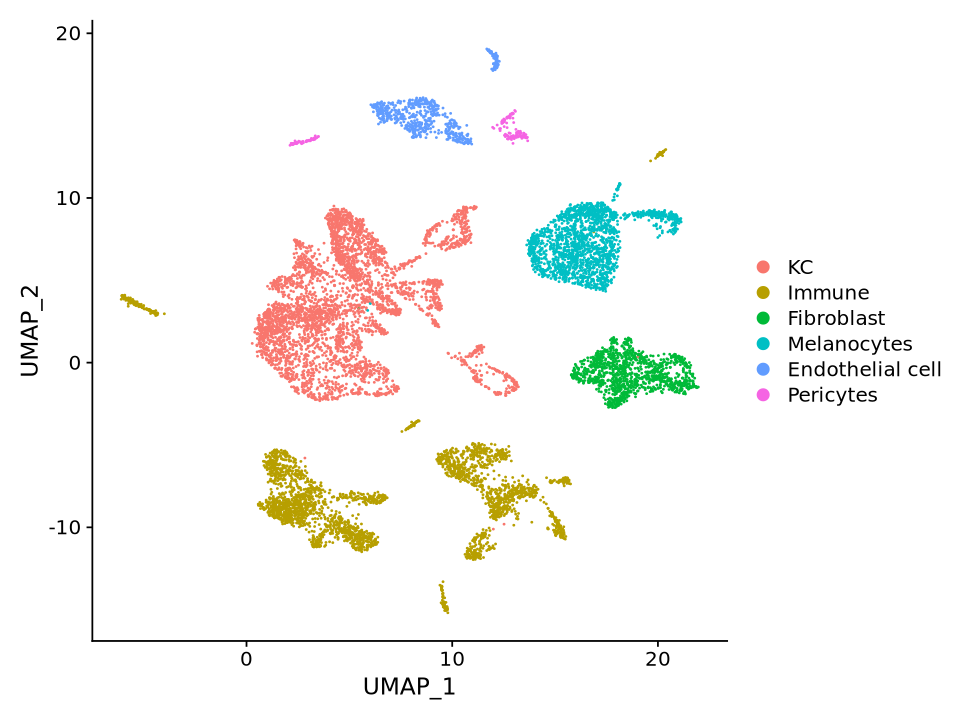

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6)
Idents(Mel_scRNA)<-Mel_scRNA@meta.data$cell_type
DimPlot(Mel_scRNA)

## CopyKAT

In [1]:
## copyKAT installation
#install.packages("devtools")
#library(devtools)
#install_github("navinlabcode/copykat")
library(copykat)

## Run CopyKAT

In [5]:
exp.rawdata<-read.csv("MPSs_count_mat.txt",sep="\t")
rownames(exp.rawdata)<-exp.rawdata$GENE
exp.rawdata<-exp.rawdata[,-1]

In [4]:
exp.rawdata[1:5,1:5]

,MPS13_AAACAAGCAATAGAGAAGAGGCAA.1,MPS13_AAACAAGCATTCCTTTAGAGGCAA.1,MPS13_AAACCAATCATCACATAGAGGCAA.1,MPS13_AAACCAATCATCGATTAGAGGCAA.1,MPS13_AAACCAATCCCATTGAAGAGGCAA.1
,<int>,<int>,<int>,<int>,<int>
SAMD11,0,0,0,0,0
NOC2L,0,0,0,0,0
KLHL17,0,0,0,0,0
PLEKHN1,1,0,0,0,0
PERM1,0,0,0,0,0


In [6]:
copykat.test <- copykat(rawmat=exp.rawdata, id.type="S", ngene.chr=5, win.size=25, KS.cut=0.1, sam.name="test", distance="euclidean", norm.cell.names="",output.seg="FLASE", plot.genes="TRUE", genome="hg20",n.cores=1) #hg20 built-in copkat is the hg38 coords


[1] "running copykat v1.1.0"
[1] "step1: read and filter data ..."
[1] "14933 genes, 10827 cells in raw data"
[1] "9942 genes past LOW.DR filtering"
[1] "step 2: annotations gene coordinates ..."
[1] "start annotation ..."
[1] "step 3: smoothing data with dlm ..."
[1] "step 4: measuring baselines ..."
number of iterations= 297 
number of iterations= 789 
number of iterations= 683 
number of iterations= 342 
number of iterations= 165 
number of iterations= 331 
[1] "step 5: segmentation..."
[1] "step 6: convert to genomic bins..."
[1] "step 7: adjust baseline ..."
[1] "step 8: final prediction ..."
[1] "step 9: saving results..."
[1] "step 10: ploting heatmap ..."
Time difference of 2.22922 hours


### Read CopyKAT predictions

In [7]:
p<-read.csv("test_copykat_prediction.txt", sep="\t",header=TRUE)
head(p)

,cell.names,copykat.pred
,<chr>,<chr>
1,MPS13_AAACCAATCATCACATAGAGGCAA.1,diploid
2,MPS13_AAACCAATCATCGATTAGAGGCAA.1,diploid
3,MPS13_AAACCAATCCCATTGAAGAGGCAA.1,diploid
4,MPS13_AAACCAATCGAAATGCAGAGGCAA.1,diploid
5,MPS13_AAACCAGGTCACGATTAGAGGCAA.1,diploid
6,MPS13_AAACCAGGTGACATTCAGAGGCAA.1,diploid


In [12]:
colnames(Mel_scRNA)<-gsub("-1",".1",colnames(Mel_scRNA))
seurat_colnames<-colnames(Mel_scRNA)
rownames(p)<-p$cell.names	
p<-p[seurat_colnames,]
# Assuming infercnv_sub_groupings is your DataFrame and seurat_colnames contains the column names from your Seurat object

# Find the order of the BC values in the seurat_colnames
bc_order <- match(p$cell.names, seurat_colnames)

# Reorder the columns of infercnv_sub_groupings based on the order
p_reordered <- p[order(bc_order), ]

# View the reordered DataFrame
dim(p_reordered)
head(p_reordered)

[1] 10747     2

,cell.names,copykat.pred
,<chr>,<chr>
MPS13_AAACAAGCAATAGAGAAGAGGCAA.1,MPS13_AAACAAGCAATAGAGAAGAGGCAA.1,not.defined
MPS13_AAACAAGCATTCCTTTAGAGGCAA.1,MPS13_AAACAAGCATTCCTTTAGAGGCAA.1,not.defined
MPS13_AAACCAATCATCACATAGAGGCAA.1,MPS13_AAACCAATCATCACATAGAGGCAA.1,diploid
MPS13_AAACCAATCATCGATTAGAGGCAA.1,MPS13_AAACCAATCATCGATTAGAGGCAA.1,diploid
MPS13_AAACCAATCCCATTGAAGAGGCAA.1,MPS13_AAACCAATCCCATTGAAGAGGCAA.1,diploid
MPS13_AAACCAATCCTCAATGAGAGGCAA.1,MPS13_AAACCAATCCTCAATGAGAGGCAA.1,not.defined


## Identify Malignant Tumor cells

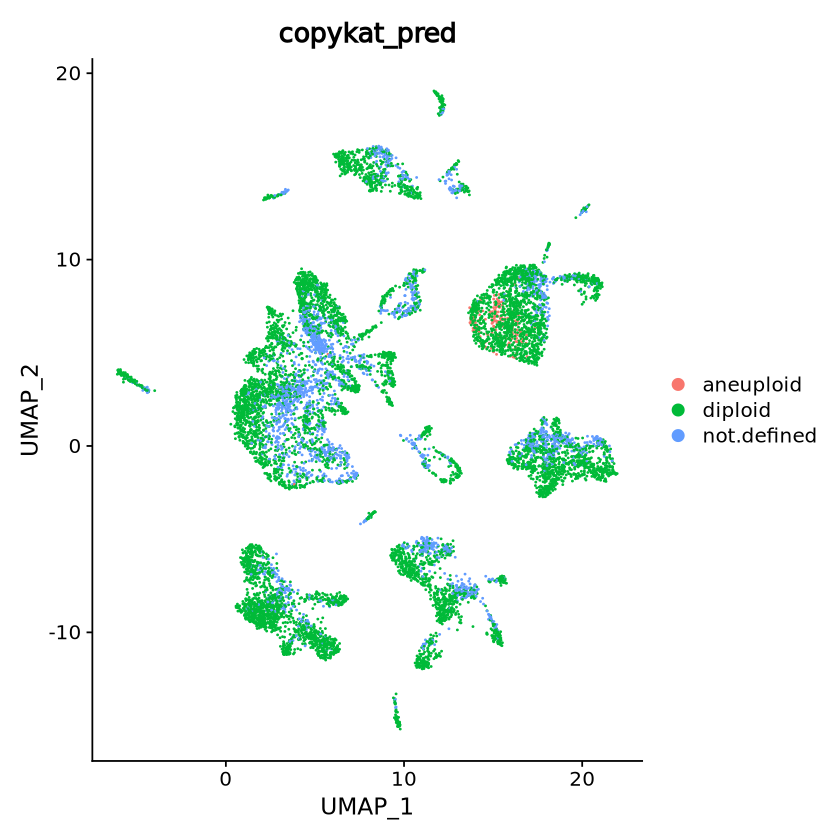

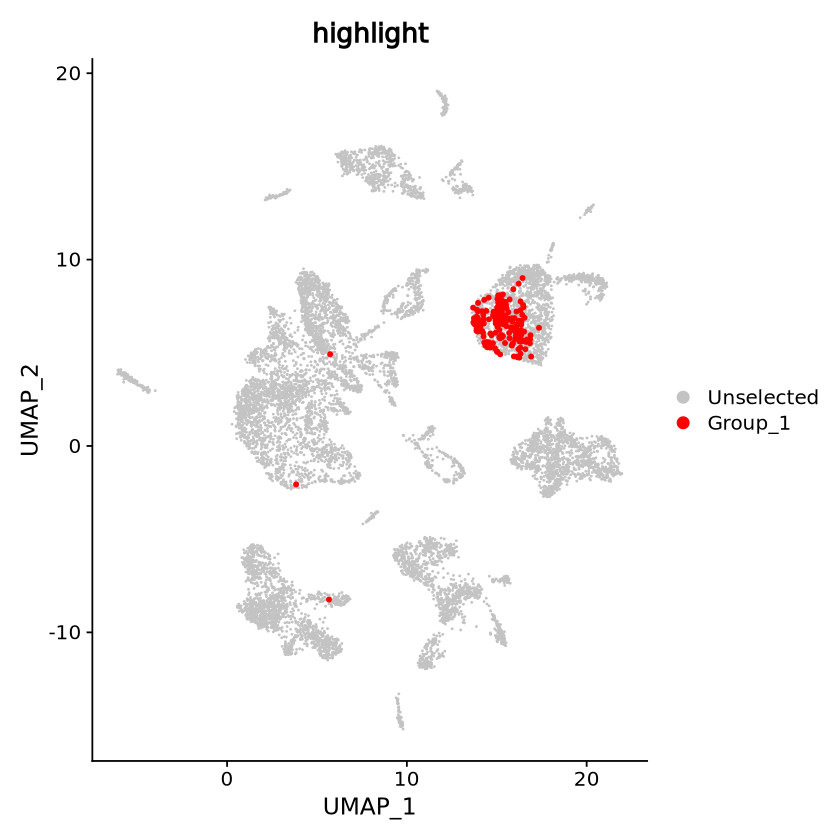

In [16]:
Mel_scRNA@meta.data$copykat_pred<-p$copykat.pred
#Mel_scRNA@meta.data$copykat_aneuploid <- ifelse(Mel_scRNA@meta.data$copykat_pred == "aneuploid", "Aneuploid", "")
aneuploid_cells <- rownames(Mel_scRNA@meta.data)[Mel_scRNA@meta.data$copykat_pred == "aneuploid"]

DimPlot(Mel_scRNA, group.by = "copykat_pred")
DimPlot(Mel_scRNA, group.by = "copykat_pred", cells.highlight = aneuploid_cells, cols.highlight = "red")

## Identify the sample with malignant tumor

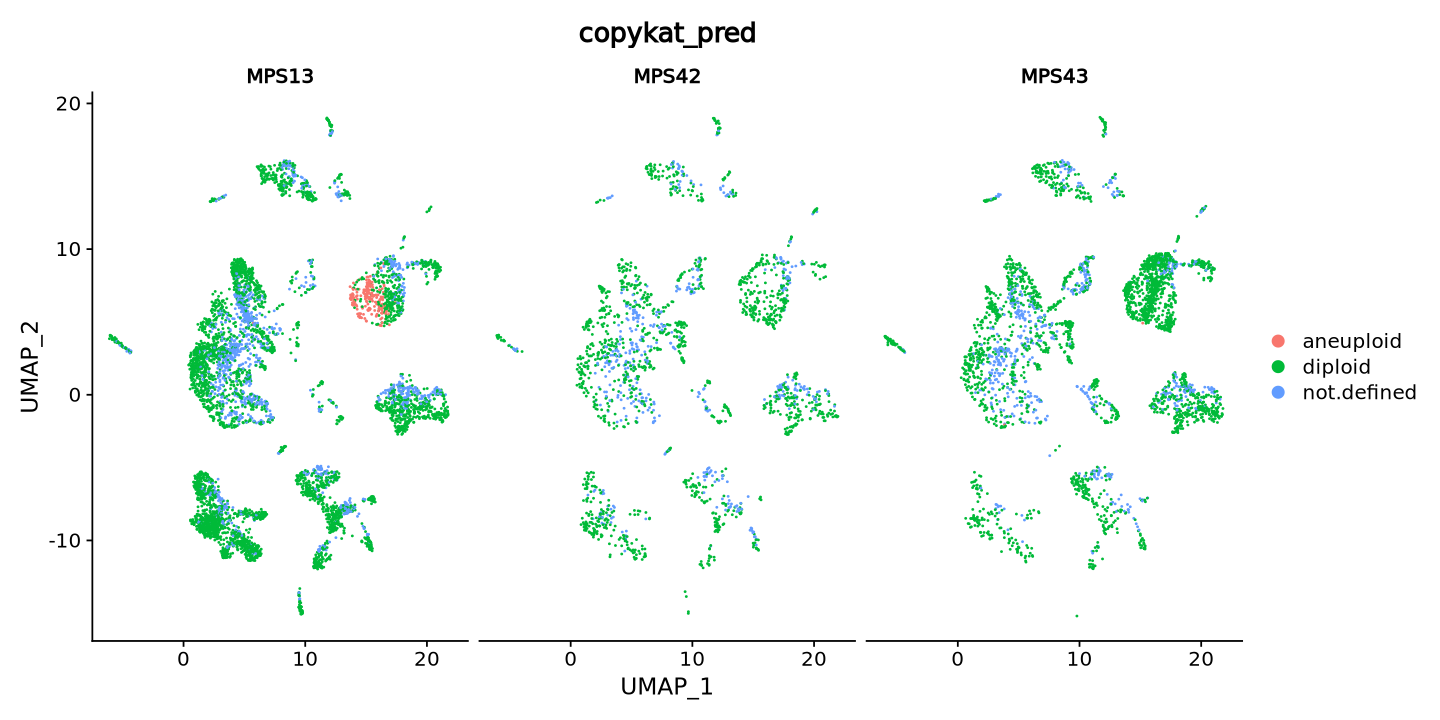

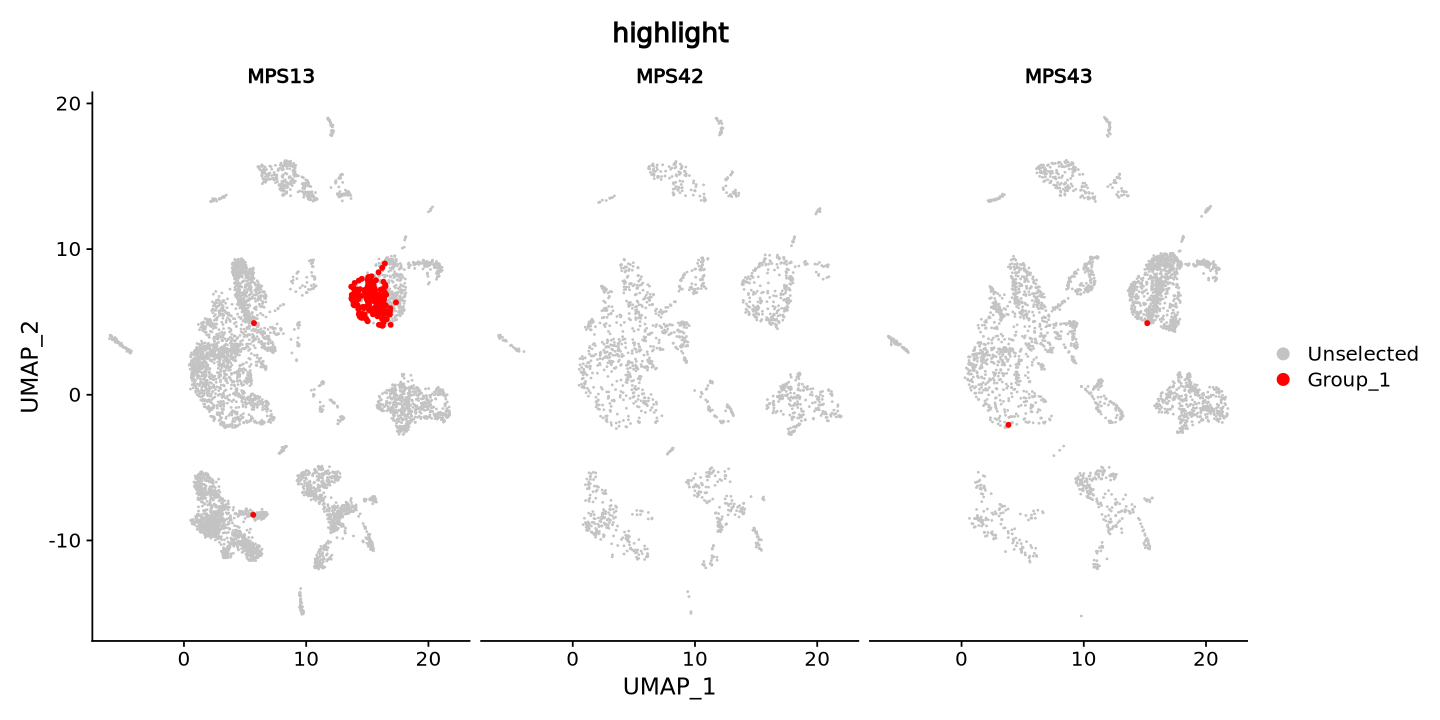

In [18]:
options(repr.plot.width = 12, repr.plot.height = 6)
DimPlot(Mel_scRNA, group.by = "copykat_pred", split.by = "orig.ident")
DimPlot(Mel_scRNA, group.by = "copykat_pred", cells.highlight = aneuploid_cells, cols.highlight = "red", split.by = "orig.ident")


## InferCNV

In [19]:
library(infercnv)

In [52]:
options("Mel_scRNA.assay.version" = "v3")
infercnv_meta <- data.frame(V1 = Mel_scRNA@meta.data$cell_type)
rownames(infercnv_meta)<-rownames(Mel_scRNA@meta.data)
head(infercnv_meta)


,V1
,<chr>
MPS13_AAACAAGCAATAGAGAAGAGGCAA.1,KC
MPS13_AAACAAGCATTCCTTTAGAGGCAA.1,KC
MPS13_AAACCAATCATCACATAGAGGCAA.1,KC
MPS13_AAACCAATCATCGATTAGAGGCAA.1,Immune
MPS13_AAACCAATCCCATTGAAGAGGCAA.1,KC
MPS13_AAACCAATCCTCAATGAGAGGCAA.1,KC


In [53]:
unique(Mel_scRNA@meta.data$Level1_res1)

[1] KC               Immune           Fibroblast       Melanocytes     
[5] Endothelial cell                 
Levels:  Endothelial cell Fibroblast Immune KC Melanocytes

### Run InferCNV

In [45]:
infercnv_obj = CreateInfercnvObject(
  raw_counts_matrix=GetAssayData(Mel_scRNA, slot="counts"),
  annotations_file=infercnv_meta,
  delim="\t",
  gene_order_file="/scratch/project/stseq/Prakrithi/skin_atlas/infercnv/hg38_gencode_v27.txt",
  ref_group_names=NULL)#c("KC","Immune","Fibroblast","Endothelial cell"))

INFO [2024-05-30 21:47:46] Parsing gene order file: /scratch/project/stseq/Prakrithi/skin_atlas/infercnv/hg38_gencode_v27.txt
INFO [2024-05-30 21:47:46] ::order_reduce:Start.
INFO [2024-05-30 21:47:46] .order_reduce(): expr and order match.
INFO [2024-05-30 21:47:46] ::process_data:order_reduce:Reduction from positional data, new dimensions (r,c) = 3258,10747 Total=-124079.596969667 Min=-0.887000739574432 Max=10.
INFO [2024-05-30 21:47:47] num genes removed taking into account provided gene ordering list: 145 = 4.45058317986495% removed.
INFO [2024-05-30 21:47:47] -filtering out cells < 100 or > Inf, removing 71.1734 % of cells
WARN [2024-05-30 21:47:47] Please use "options(scipen = 100)" before running infercnv if you are using the analysis_mode="subclusters" option or you may encounter an error while the hclust is being generated.
INFO [2024-05-30 21:47:47] validating infercnv_obj


In [46]:
out_dir = tempfile()
infercnv_obj_default = infercnv::run(
    infercnv_obj,
    cutoff=1, # cutoff=1 works well for Smart-seq2, and cutoff=0.1 works well for 10x Genomics
    out_dir="infercnv/all/",
    cluster_by_groups=TRUE, 
    plot_steps=FALSE,
    denoise=TRUE,
    HMM=FALSE,
    no_prelim_plot=TRUE,
    png_res=60
)


INFO [2024-05-30 21:48:16] ::process_data:Start
INFO [2024-05-30 21:48:16] Creating output path infercnv/all/
INFO [2024-05-30 21:48:16] Checking for saved results.
INFO [2024-05-30 21:48:16] 

	STEP 1: incoming data

INFO [2024-05-30 21:48:17] 

	STEP 02: Removing lowly expressed genes

INFO [2024-05-30 21:48:17] ::above_min_mean_expr_cutoff:Start
INFO [2024-05-30 21:48:17] Removing 3003 genes from matrix as below mean expr threshold: 1
INFO [2024-05-30 21:48:17] validating infercnv_obj
INFO [2024-05-30 21:48:17] There are 110 genes and 284 cells remaining in the expr matrix.
INFO [2024-05-30 21:48:17] no genes removed due to min cells/gene filter
INFO [2024-05-30 21:48:17] 

	STEP 03: normalization by sequencing depth

INFO [2024-05-30 21:48:17] normalizing counts matrix by depth
INFO [2024-05-30 21:48:17] Computed total sum normalization factor as median libsize: 157.637109
INFO [2024-05-30 21:48:17] 

	STEP 04: log transformation of data

INFO [2024-05-30 21:48:17] transforming log

Warning message in g({:
“NaNs produced”


INFO [2024-05-30 21:48:17] 

	STEP 08: removing average of reference data (before smoothing)

INFO [2024-05-30 21:48:17] ::subtract_ref_expr_from_obs:Start inv_log=FALSE, use_bounds=TRUE
INFO [2024-05-30 21:48:17] -no reference cells specified... using mean of all cells as proxy
INFO [2024-05-30 21:48:17] -subtracting expr per gene, use_bounds=TRUE
INFO [2024-05-30 21:48:18] 

	STEP 09: apply max centered expression threshold: 3

INFO [2024-05-30 21:48:18] ::process_data:setting max centered expr, threshold set to: +/-:  3
INFO [2024-05-30 21:48:19] 

	STEP 10: Smoothing data per cell by chromosome

INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr1
INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr2
INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr3
INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr4
INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr5
INFO [2024-05-30 21:48:19] smooth_by_chromosome: chr: chr6
INFO [2024-05-30 21:48:19] smooth_by_ch

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“The following 69 features requested have zero variance; running reduction without them: MCAM, COL9A3, LINGO1, FMN1, TFAP2B, MLANA, TNC, CDH19, SPRED1, PRSS23, OAF, ABHD2, BIRC7, TRPM3, ITGA10, ALDH1A3, TYR, FRMD5, SDC3, ZNF697, COL9A1, OSTM1, SLC1A4, LOXL3, SLC20A1, TMEM163, SERPINE2, ITM2C, MLPH, RAB17, CYTL1, FGFBP2, QDPR, SNCA, SLC9A3, SEMA5A, DUSP4, PLAT, CTHRC1, ANGPT1, LY6E, ITIH5, MSRB2, BAMBI, ZCCHC24, LOXL4, SCD, MGP, SOX5, NR4A1, PMEL, PHLDA1, SLC6A15, DUSP6, IFI27, WARS, MOK, MT2A, CDH3, DBNDD1, ITGB3, LGALS3BP, MFSD12, BST2, CD22, MIA, S100B, LGALS1, SOX10”
Warning message:
“Requested number is larger than the number of available items (41). Setting to 41.”
Warning message:
“Requested number is larger than the number of available items (41). Setting to 41.”
Warning message:
“Requested number is larger than the nu

INFO [2024-05-30 21:48:21] define_signif_tumor_subclusters(), tumor: 15
INFO [2024-05-30 21:48:21] Setting auto leiden resolution for 15 to 0.266148


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“The following 69 features requested have zero variance; running reduction without them: SPRED1, CSRP1, MPZ, NES, IFI6, S100A1, ANGPTL7, SDC3, CDH19, IER3, ITGA10, FMN1, MARCKSL1, ZNF697, TYR, BIRC7, LINGO1, COL11A1, LAMA4, MCOLN3, CD276, CSPG4, SLC1A4, LOXL3, SLC20A1, TMEM163, SERPINE2, ITM2C, MLPH, RAB17, CYTL1, FGFBP2, QDPR, SNCA, SLC9A3, SEMA5A, DUSP4, PLAT, CTHRC1, ANGPT1, LY6E, ITIH5, MSRB2, BAMBI, ZCCHC24, LOXL4, SCD, MGP, SOX5, NR4A1, PMEL, PHLDA1, SLC6A15, DUSP6, IFI27, WARS, MOK, MT2A, CDH3, DBNDD1, ITGB3, LGALS3BP, MFSD12, BST2, CD22, MIA, S100B, LGALS1, SOX10”
Warning message:
“Requested number is larger than the number of available items (41). Setting to 41.”
Warning message:
“Requested number is larger than the number of available items (41). Setting to 41.”
Warning message:
“Requested number is larger than the 

INFO [2024-05-30 21:48:22] define_signif_tumor_subclusters(), tumor: 19
INFO [2024-05-30 21:48:22] Less cells in group 19 than k_nn setting. Keeping as a single subcluster.
INFO [2024-05-30 21:48:22] define_signif_tumor_subclusters(), tumor: 6
INFO [2024-05-30 21:48:22] Less cells in group 6 than k_nn setting. Keeping as a single subcluster.
INFO [2024-05-30 21:48:22] ::plot_cnv:Start
INFO [2024-05-30 21:48:22] ::plot_cnv:Current data dimensions (r,c)=110,284 Total=31523.9000985466 Min=0.152190361295983 Max=8.0712690249139.
INFO [2024-05-30 21:48:22] ::plot_cnv:Depending on the size of the matrix this may take a moment.
INFO [2024-05-30 21:48:22] plot_cnv(): auto thresholding at: (0.445629 , 1.572547)
INFO [2024-05-30 21:48:22] plot_cnv_observation:Start
INFO [2024-05-30 21:48:22] Observation data size: Cells= 284 Genes= 110
INFO [2024-05-30 21:48:22] clustering observations via method: ward.D
INFO [2024-05-30 21:48:22] Number of cells in group(1) is 48
INFO [2024-05-30 21:48:22] group

In [6]:
infercnv_sub_groupings<-read.csv("infercnv/all/infercnv_subclusters.observation_groupings.txt", sep=" ",header=TRUE)
tail(infercnv_sub_groupings)

,Dendrogram.Group,Dendrogram.Color,Annotation.Group,Annotation.Color
,<int>,<chr>,<int>,<chr>
MPS13_GTTGGATAGGCGATATAGAGGCAA.1,1,#8DD3C7,12,#FFED6F
AAACCAGGTAAAGGCCATACGTCA.1,1,#8DD3C7,12,#FFED6F
MPS13_TTCCTCCCATTGTGAGAGAGGCAA.1,1,#8DD3C7,12,#FFED6F
TGCTTAAGTGCTGCACATACGTCA.1,1,#8DD3C7,12,#FFED6F
MPS42_AACCCGGCATTGTGTCACTACTCA.1,1,#8DD3C7,12,#FFED6F
CTCATTACAACAGGGAATACGTCA.1,1,#8DD3C7,12,#FFED6F


In [61]:
unique(infercnv_sub_groupings$Annotation.Group)
dim(infercnv_sub_groupings)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

[1] 284   4

In [64]:
# Assuming infercnv_sub_groupings is your DataFrame and seurat_colnames contains the column names from your Seurat object
rownames(infercnv_sub_groupings)<-infercnv_sub_groupings$BC

# Find the order of the BC values in the seurat_colnames
bc_order <- match(rownames(infercnv_sub_groupings), colnames(Mel_scRNA))

# Reorder the columns of infercnv_sub_groupings based on the order
infercnv_sub_groupings_reordered <- infercnv_sub_groupings[order(bc_order), ]

# View the reordered DataFrame
head(infercnv_sub_groupings_reordered)

,Dendrogram.Group,Dendrogram.Color,Annotation.Group,Annotation.Color
,<int>,<chr>,<int>,<chr>
1,1,#8DD3C7,1,#8DD3C7
2,1,#8DD3C7,1,#8DD3C7
3,1,#8DD3C7,1,#8DD3C7
4,1,#8DD3C7,1,#8DD3C7
5,1,#8DD3C7,1,#8DD3C7
6,1,#8DD3C7,1,#8DD3C7


In [12]:
# Assuming Mel_scRNA is your Seurat object and infercnv_sub_groupings is your data frame

# Create a new column in Mel_scRNA@meta.data with empty values
Mel_scRNA@meta.data$infercnv_pred <- ""

# Get the row names of both data frames
mel_row_names <- rownames(Mel_scRNA@meta.data)
infercnv_row_names <- rownames(infercnv_sub_groupings)

# Find the matching row names
matching_row_names <- intersect(mel_row_names, infercnv_row_names)

# Update the new column with "Aneuploid" for matching rows
Mel_scRNA@meta.data[matching_row_names, "infercnv_pred"] <- "Aneuploid"

# Check the updated meta.data
head(Mel_scRNA@meta.data)


,orig.ident,nCount_RNA,nFeature_RNA,nFeaturess_RNA_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_res0_25,leiden_res0_5,leiden_res1,Level1,Level2,Level1_res1,Level2_res1,copykat_pred,cell_type,infercnv_pred
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
MPS13_AAACAAGCAATAGAGAAGAGGCAA.1,MPS13,971,594,593,970,7,0.7216495,6,6,8,13,KC,KC Cornified,KC,KC Cornified,not.defined,KC,
MPS13_AAACAAGCATTCCTTTAGAGGCAA.1,MPS13,969,502,502,969,10,1.0319917,6,6,8,13,KC,KC Cornified,KC,KC Cornified,not.defined,KC,
MPS13_AAACCAATCATCACATAGAGGCAA.1,MPS13,1183,810,808,1180,22,1.8644068,9,6,8,12,KC,KC Differentiating,KC,KC Differentiating,diploid,KC,
MPS13_AAACCAATCATCGATTAGAGGCAA.1,MPS13,1703,1303,1302,1701,28,1.6460905,7,2,9,8,Immune,T cell,Immune,CD8+ T cell,diploid,Immune,
MPS13_AAACCAATCCCATTGAAGAGGCAA.1,MPS13,3297,1792,1792,3297,33,1.0009099,9,6,8,12,KC,KC Differentiating,KC,KC Differentiating,diploid,KC,
MPS13_AAACCAATCCTCAATGAGAGGCAA.1,MPS13,667,557,556,666,0,0.0000000,11,8,11,16,KC,KC stem/hair/stress,KC,KC stem/hair/stress,not.defined,KC,


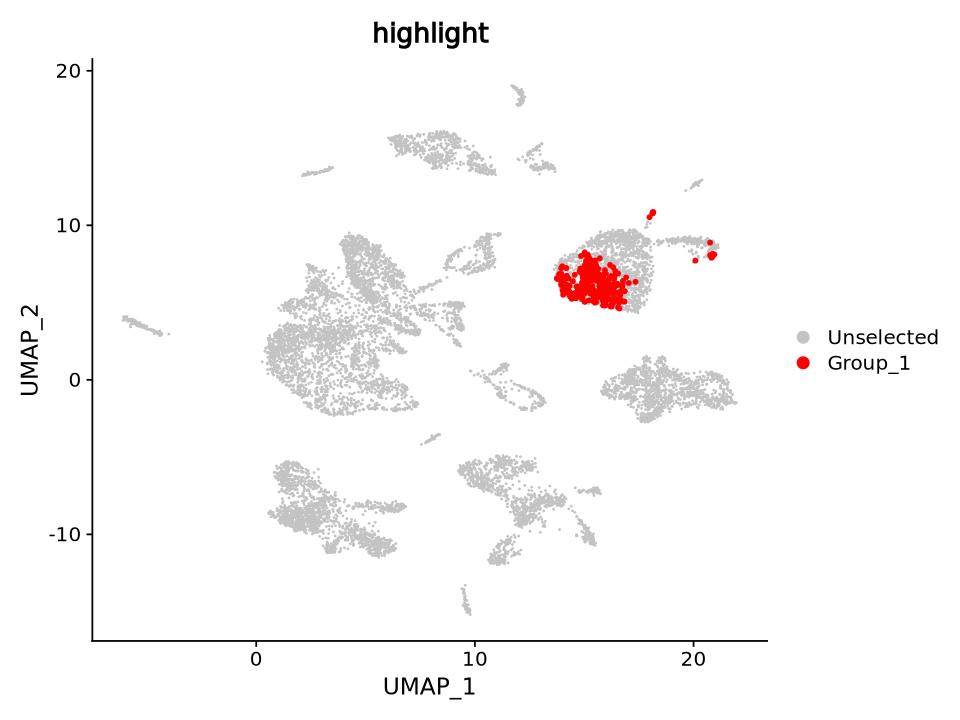

In [18]:
infercnv_aneuploid_cells <- rownames(Mel_scRNA@meta.data)[Mel_scRNA@meta.data$infercnv_pred == "Aneuploid"]
DimPlot(Mel_scRNA, group.by = "infercnv_pred", cells.highlight = infercnv_aneuploid_cells, cols.highlight = "red")


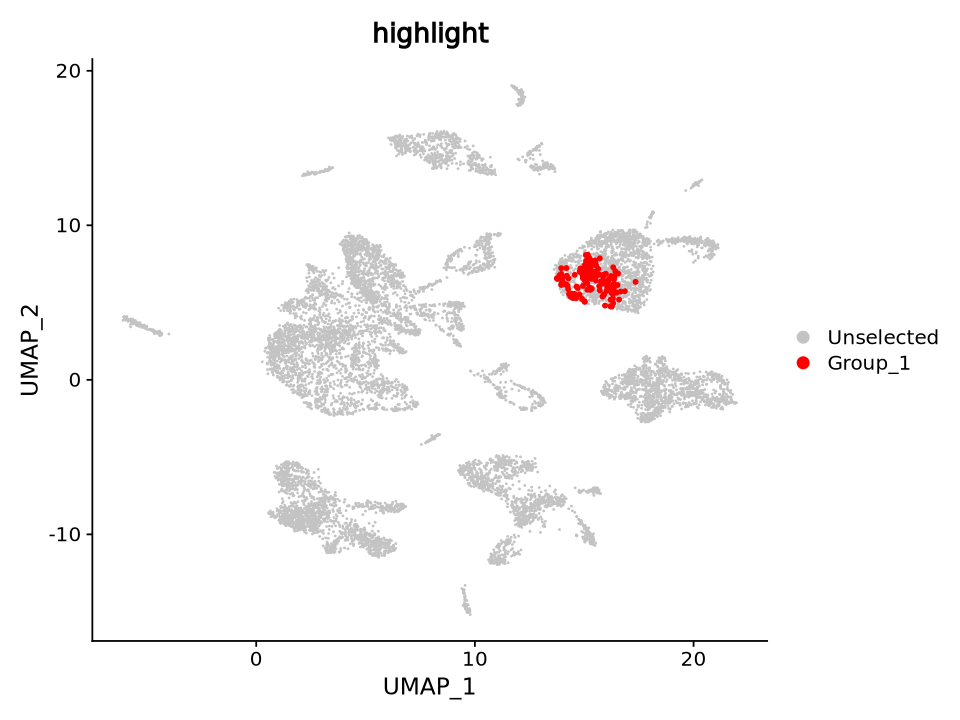

In [16]:
# Create a new column in Mel_scRNA@meta.data with empty values
Mel_scRNA@meta.data$copykat_infercnv_consistent <- ""

# Update the new column with "Aneuploid" where both conditions are met
Mel_scRNA@meta.data$copykat_infercnv_consistent[Mel_scRNA@meta.data$infercnv_pred == "Aneuploid" & Mel_scRNA@meta.data$copykat_pred == "aneuploid"] <- "Aneuploid"

# Highlight the cells that are consistent between infercnv and copykat predictions
consistent_cells <- rownames(Mel_scRNA@meta.data)[Mel_scRNA@meta.data$copykat_infercnv_consistent == "Aneuploid"]
DimPlot(Mel_scRNA, group.by = "copykat_infercnv_consistent", cells.highlight = consistent_cells, cols.highlight = "red")


## Spatial CopyKAT

In [1]:
library(copykat)
setwd("/QRISdata/Q4386/QIMR_workshop_CNV/Mel_3samples/Mel_spatial/")

In [ ]:
exp.rawdata <- read.csv("gene_counts_mat.txt",sep="\t", header=TRUE) #gene-expression matrix
rownames(exp.rawdata)<-exp.rawdata$GENE
exp.rawdata<-exp.rawdata[,-1]

In [ ]:
copykat.test <- copykat(rawmat=exp.rawdata, id.type="S", ngene.chr=5, win.size=25, KS.cut=0.1, sam.name="test", distance="euclidean", norm.cell.names="",output.seg="FLASE", plot.genes="TRUE", genome="hg20",n.cores=1) #hg20 built-in copkat is the hg38 coords

In [ ]:
## extract ploidy 
pred.test <- data.frame(copykat.test$prediction)
pred.test <- pred.test[-which(pred.test$copykat.pred=="not.defined"),]  ##remove undefined cells
CNA.test <- data.frame(copykat.test$CNAmat)

### define sub-clones
tumor.cells <- pred.test$cell.names[which(pred.test$copykat.pred=="aneuploid")]
tumor.mat <- CNA.test[, which(colnames(CNA.test) %in% tumor.cells)]
hcc <- hclust(parallelDist::parDist(t(tumor.mat),threads =4, method = "euclidean"), method = "ward.D2")
hc.umap <- cutree(hcc,3)
write.table(hc.umap,"3subclones_BCs.csv", sep=",", quote=TRUE)

In [7]:
spatial_data<-Load10X_Spatial("./",
                    filename = "CytAssist_FFPE_Human_Skin_Melanoma_filtered_feature_bc_matrix.h5",
                    assay = "RNA",
                    slice = "slice1",
                    filter.matrix = TRUE,
                    to.upper = FALSE,
                    image = NULL
)

In [8]:
# normalize data
spatial_data[["percent.mt"]] <- PercentageFeatureSet(spatial_data, pattern = "^MT-")
spatial_data <- NormalizeData(spatial_data, normalization.method = "LogNormalize", scale.factor = 10000)
spatial_data <- FindVariableFeatures(spatial_data, selection.method = "vst", nfeatures = 2000)

# scale and run PCA
spatial_data <- ScaleData(spatial_data, features = rownames(spatial_data))
spatial_data <- RunPCA(spatial_data, features = VariableFeatures(object = spatial_data))

# Check number of PC components (we selected 10 PCs for downstream analysis, based on Elbow plot)
#ElbowPlot(spatial_data)

# cluster and visualize
spatial_data <- FindNeighbors(spatial_data, dims = 1:30)
spatial_data <- FindClusters(spatial_data, resolution = 0.8)
spatial_data <- RunUMAP(spatial_data, dims = 1:30)


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  BMPR1B, MBP, ANKRD28, GAPDHS, CORO2B, ALX1, BTBD10, PTDSS1, CRYAB, SYBU 
	   HSPB2, AP1S2, RCN1, ST8SIA1, LGI3, TMEM97, PPIL1, TOP1MT, PRKDC, ETV5 
	   TYMS, TRIM63, MAPT, CTSF, UHRF1BP1, ANKS1B, ALDH3B1, TMEM251, RAC3, GJB1 
Negative:  KRT14, DSP, PERP, KRT5, FOS, TRIM29, CXCL14, KRT1, CRABP2, JUP 
	   CALML5, SFN, DSG1, GJA1, FLG, KRT10, DUSP1, KRTDAP, DSC3, PKP1 
	   KRT6A, KRT16, CALML3, TACSTD2, CSTA, C19orf33, LY6D, FXYD3, SBSN, HOPX 
PC_ 2 
Positive:  COL1A2, COMP, COL3A1, COL1A1, MMP2, DCN, COL6A3, CXCL12, LUM, SFRP2 
	   COL14A1, FBN1, FBLN2, C1R, VCAN, CCDC80, C1S, COL5A1, AQP1, CLU 
	   THY1, CTSK, CCN2, PCOLCE, S100A4, IGKC, PECAM1, FSTL1, IGHG1, SLIT3 
Negative:  SBSN, SPRR1B, IVL, CSTA, KRT80, SPINK5, KRTDAP, KLK7, KLK5, SPRR2G 
	   SPRR2E, CNFN, SULT2B1, CASP14, NCCRP1, KLK8, GLTP, KLK11, KRT78, SLURP2 
	   MAL2, DSC1, WFDC5, SERPINB3, SERPINB12, AB

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3458
Number of edges: 113003

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8822
Number of communities: 15
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:55:08 UMAP embedding parameters a = 0.9922 b = 1.112

22:55:08 Read 3458 rows and found 30 numeric columns

22:55:08 Using Annoy for neighbor search, n_neighbors = 30

22:55:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:55:08 Writing NN index file to temp file /scratch/temp/9443593/RtmphEIjb9/file81c6b6e08f899

22:55:08 Searching Annoy index using 1 thread, search_k = 3000

22:55:09 Annoy recall = 100%

22:55:09 Commencing smooth kNN distance calibration using 1 thread
 with ta

Warning message:
“Not validating Seurat objects”


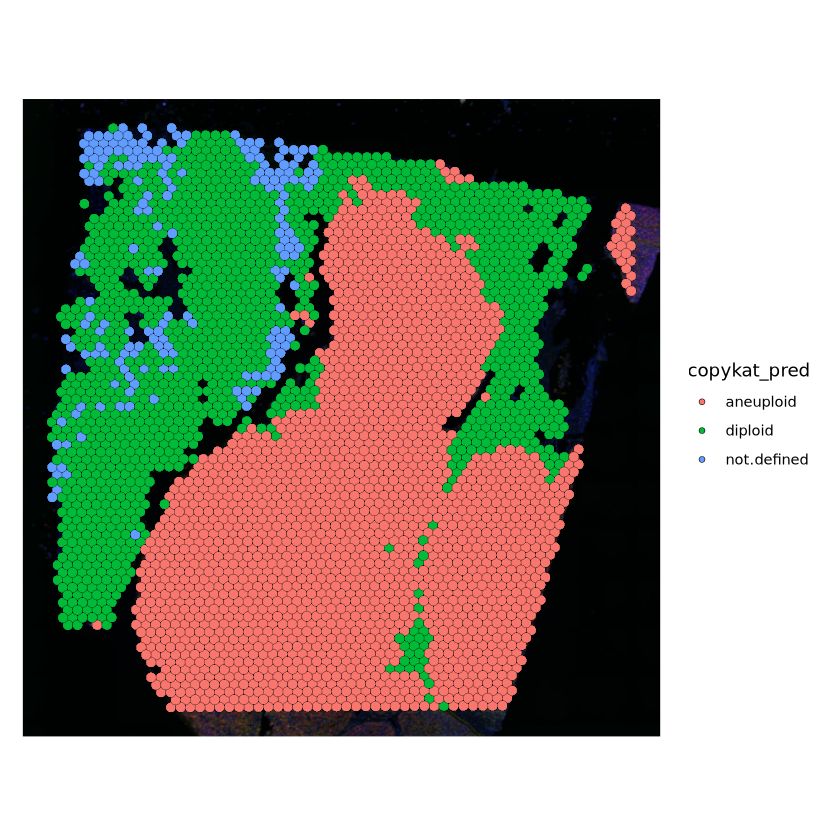

In [22]:
p<-read.csv("test_copykat_prediction.txt", sep="\t",header=TRUE)
colnames(spatial_data)<-gsub("-1",".1",colnames(spatial_data))
spatial_data_sub<-subset(spatial_data, cells = p$cell.names)

seurat_colnames<-colnames(spatial_data_sub)
rownames(p)<-p$cell.names	
p<-p[seurat_colnames,]

# Find the order of the BC values in the seurat_colnames
bc_order <- match(p$cell.names, seurat_colnames)

# Reorder the columns of infercnv_sub_groupings based on the order
p_reordered <- p[order(bc_order), ]



spatial_data_sub@meta.data$copykat_pred<-p$copykat.pred
SpatialDimPlot(spatial_data_sub, group.by = "copykat_pred")

In [27]:
c<-read.csv("3subclones_BCs.csv")
dim(c)
head(c)

[1] 1912    1

,x
,<int>
AACACTTGGCAAGGAA.1,1
AACAGGATTCATAGTT.1,1
AACAGGTTCACCGAAG.1,1
AACATAGTCTATCTAC.1,2
AACATCTAATGACCGG.1,1
AACATGCGCAAGTGAG.1,2


Warning message:
“Not validating Seurat objects”


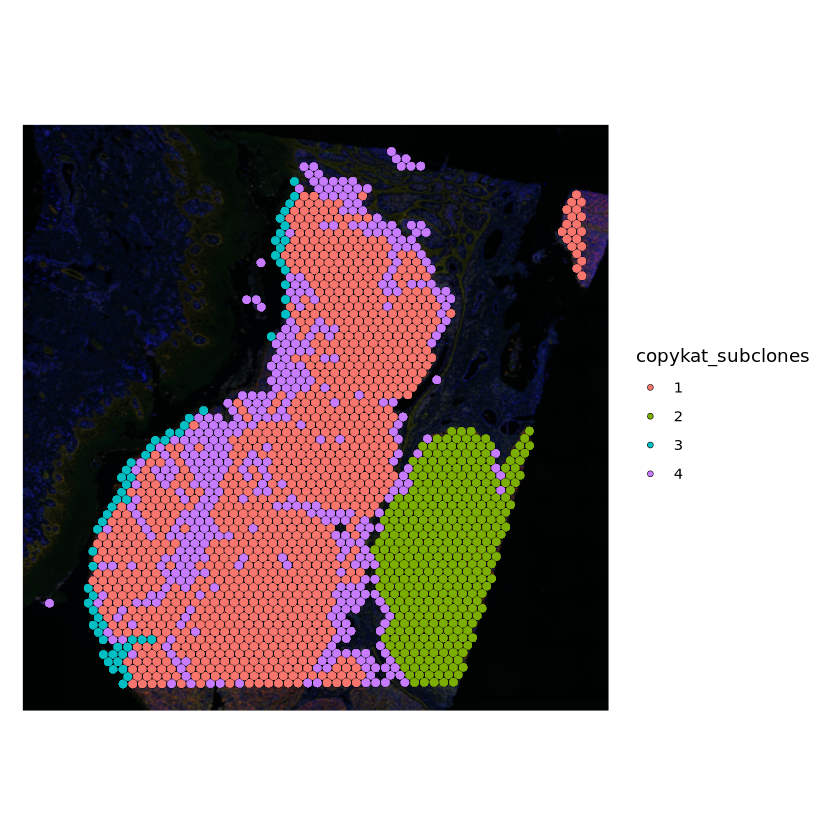

In [28]:


spatial_data_subclones<-subset(spatial_data_sub, cells = rownames(c))

seurat_colnames<-colnames(spatial_data_subclones)

# Find the order of the BC values in the seurat_colnames
bc_order <- match(rownames(c), seurat_colnames)

# Reorder the columns of infercnv_sub_groupings based on the order
c_reordered <- c[order(bc_order), ]
spatial_data_subclones@meta.data$copykat_subclones <- c$x
SpatialDimPlot(spatial_data_subclones, group.by = "copykat_subclones")


In [ ]:
saveRDS(spatial_data,"spatial_data.rds")
saveRDS(spatial_data_subclones,"spatial_data_subclones.rds")
